### New Gram-Schmidt file with Ryan Coffee's suggestions
2022.11.14

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
from darfix.core.dataset import Dataset
import GS_Backend as gs
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as patches
import cv2

/Users/pin9465/opt/anaconda3/envs/darfix/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
file_dir_00 = '/Users/pin9465/Library/CloudStorage/OneDrive-Personal/桌面/Study/Stanford/Lab Research/Raw Data/Al_111_rockinglayer_00'
file_dir_01 = '/Users/pin9465/Library/CloudStorage/OneDrive-Personal/桌面/Study/Stanford/Lab Research/Raw Data/Al_111_rockinglayer_01'
saved_dir_00 = '/Users/pin9465/Library/CloudStorage/OneDrive-Personal/桌面/Study/Stanford/Lab Research/Raw Data/Al_111_rockinglayer_00/treated'
Al_111_rockinglayer_00_dataset = gs.import_dataset(file_dir_00, saved_dir_00)
Al_111_rockinglayer_01_dataset = gs.import_dataset(file_dir_01, saved_dir_00)

# now let's print the output of the data that just saved
print(f"The size of dataset is {Al_111_rockinglayer_00_dataset.__dict__['_data'].shape}.")
print(f"The size of dataset is {Al_111_rockinglayer_01_dataset.__dict__['_data'].shape}.")

There are 38 files in the directory
First filename is Al_111_rockinglayer_00_0000.edf.
The size of the resulting dataset is 31
There are 31 files in the directory
First filename is Al_111_rockinglayer_01_0000.edf.
The size of the resulting dataset is 31
The size of dataset is (31, 2160, 2560).
The size of dataset is (31, 2160, 2560).


In [3]:
Al_111_rockinglayer_00 = gs.Dataset2Numpy(Al_111_rockinglayer_00_dataset)
rockinglayer = Al_111_rockinglayer_00

The size of image array is (2160, 2560, 31)


In [4]:
font = {'family' : 'serif',
        'weight':'normal',
        'size': 16}
plt.rc('font', **font)

Image array shape is: (2160, 2560, 31)
ROI value is [1000, 1050, 550, 600]
Image array shape is: (2160, 2560, 31)
ROI value is [1500, 1550, 2350, 2400]
Image array shape is: (2160, 2560, 31)
ROI value is [750, 800, 1450, 1500]


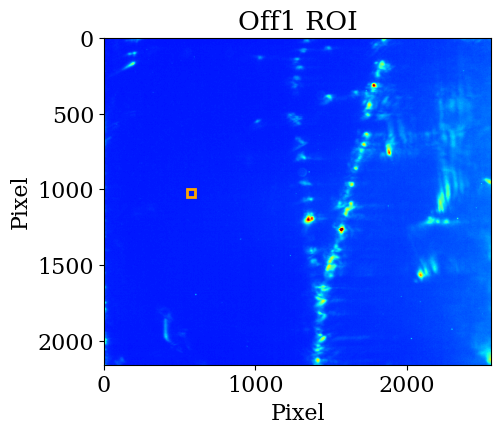

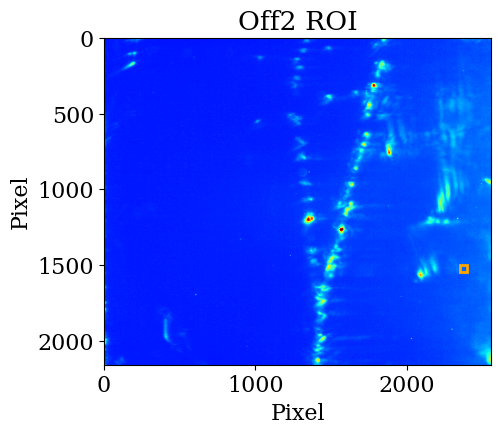

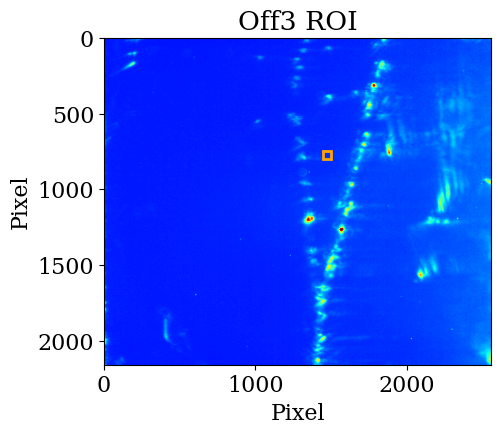

In [50]:
# roi should be 0
off_defect_roi1 = [1000, 1050, 550, 600] #(1025, 575)
off_defect_roi2 = [1500, 1550, 2350, 2400] #(1525,2375) 
off_defect_roi3 = [750,800,1450,1500]
on_defect_minus_roi = [1170, 1220, 1328, 1378] # (1200,1350)
on_defect_plus_roi = [305, 355, 1208, 1258] #(330,1220)


# gs.plot_roi_patch_image(rockinglayer, 6, on_defect_minus_roi, 'Minus ROI')
# gs.plot_roi_patch_image(rockinglayer, 13, on_defect_plus_roi, 'Plus ROI')
gs.plot_roi_patch_image(rockinglayer, 6, off_defect_roi1, 'Off1 ROI')
gs.plot_roi_patch_image(rockinglayer, 6, off_defect_roi2, 'Off2 ROI')
gs.plot_roi_patch_image(rockinglayer, 6, off_defect_roi3, 'Off3 ROI')


In [51]:
off_defect_array1 = gs.get_img_roi_array(rockinglayer, off_defect_roi1)
off_defect_array2 = gs.get_img_roi_array(rockinglayer, off_defect_roi2)
off_defect_array3 = gs.get_img_roi_array(rockinglayer, off_defect_roi3)
on_defect_minus_array = gs.get_img_roi_array(rockinglayer, on_defect_minus_roi)
on_defect_plus_array = gs.get_img_roi_array(rockinglayer, on_defect_plus_roi)

In [52]:
mean_intensity_off1 = gs.get_mean_intensity_list(off_defect_array1)
mean_intensity_off2 = gs.get_mean_intensity_list(off_defect_array2)
mean_intensity_off3 = gs.get_mean_intensity_list(off_defect_array3)
mean_intensity_minus = gs.get_mean_intensity_list(on_defect_minus_array)
mean_intensity_plus = gs.get_mean_intensity_list(on_defect_plus_array)

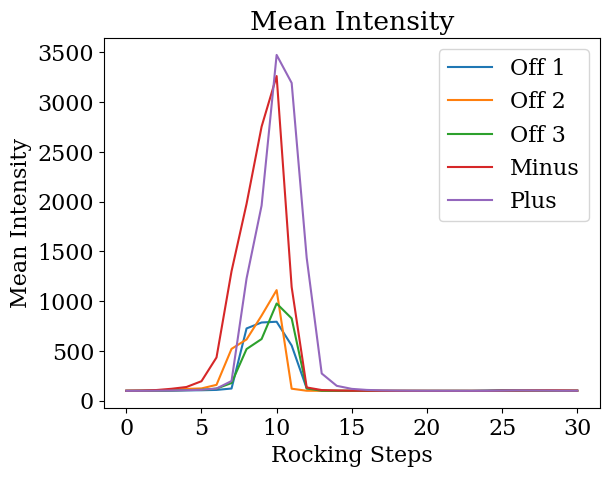

In [53]:
fig, ax = plt.subplots(1,1)
ax.plot(mean_intensity_off1, label = 'Off 1')
ax.plot(mean_intensity_off2, label = 'Off 2')
ax.plot(mean_intensity_off3, label = 'Off 3')
ax.plot(mean_intensity_minus, label = 'Minus')
ax.plot(mean_intensity_plus, label = 'Plus')
ax.set_xlabel('Rocking Steps')
ax.set_ylabel('Mean Intensity')
ax.set_title('Mean Intensity')
plt.legend()

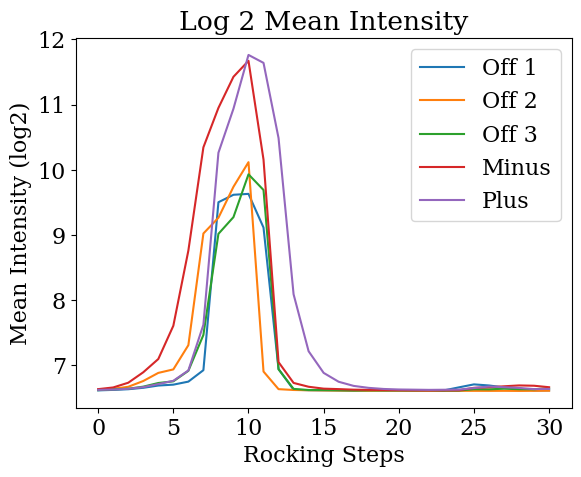

In [54]:
# take log 2 of the mean intensity to emphasize the feature
log2_mean_intensity_off1 = np.log2(mean_intensity_off1)
log2_mean_intensity_off2 = np.log2(mean_intensity_off2)
log2_mean_intensity_off3 = np.log2(mean_intensity_off3)
log2_mean_intensity_minus = np.log2(mean_intensity_minus)
log2_mean_intensity_plus = np.log2(mean_intensity_plus)

fig, ax = plt.subplots(1,1)
ax.plot(log2_mean_intensity_off1, label = 'Off 1')
ax.plot(log2_mean_intensity_off2, label = 'Off 2')
ax.plot(log2_mean_intensity_off3, label = 'Off 3')
ax.plot(log2_mean_intensity_minus, label = 'Minus')
ax.plot(log2_mean_intensity_plus, label = 'Plus')
ax.set_title('Log 2 Mean Intensity')
ax.set_xlabel('Rocking Steps')
ax.set_ylabel('Mean Intensity (log2)')
plt.legend()



### Image Analysis 

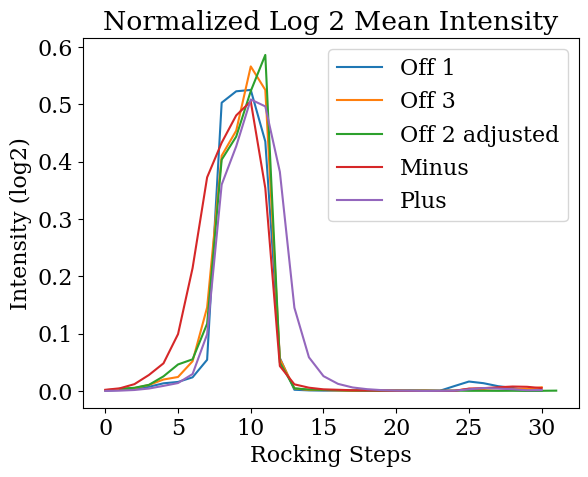

In [55]:
# normalize off defect intensity first
normed_mean_intensity_off1 = gs.get_normalized_intensity_list(log2_mean_intensity_off1)
normed_mean_intensity_off2 = gs.get_normalized_intensity_list(log2_mean_intensity_off2)
normed_mean_intensity_off3 = gs.get_normalized_intensity_list(log2_mean_intensity_off3)
normed_mean_intensity_minus = gs.get_normalized_intensity_list(log2_mean_intensity_minus)
normed_mean_intensity_plus = gs.get_normalized_intensity_list(log2_mean_intensity_plus)

fig, ax = plt.subplots(1,1)
ax.plot(normed_mean_intensity_off1, label = 'Off 1')
# ax.plot(normed_mean_intensity_off2, label = 'Off 2')
ax.plot(normed_mean_intensity_off3, label = 'Off 3')
ax.plot(np.arange(31)+1, normed_mean_intensity_off2, label= 'Off 2 adjusted') # correction we need to do
ax.plot(normed_mean_intensity_minus, label = 'Minus')
ax.plot(normed_mean_intensity_plus, label = 'Plus')
ax.set_title('Normalized Log 2 Mean Intensity')
ax.set_xlabel('Rocking Steps')
ax.set_ylabel('Intensity (log2)')
plt.legend()

In [ ]:
# (CNN)
# convolution kernel
# padding = true 
# kernel size 5*5*11 (removing the need to FFT) (not using single pixel)
# dimension of feature = 5 (or 3)
# train subwindow on the images with equal amount (pixel) of defect and non-defect

# produce training set!

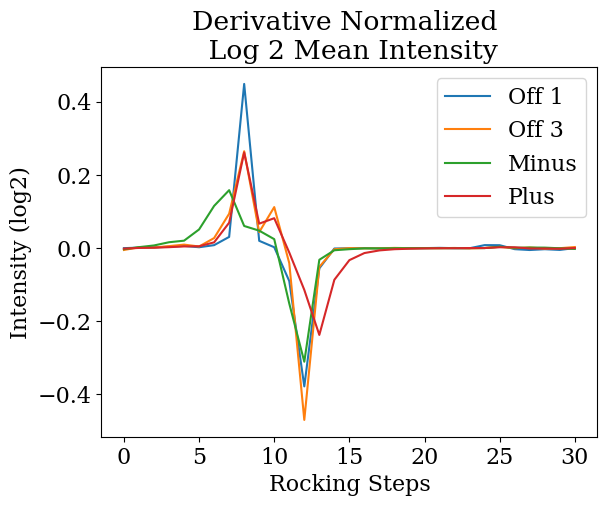

In [56]:
# normalize off defect intensity first
der_normed_mean_intensity_off1 =  normed_mean_intensity_off1 - np.roll(normed_mean_intensity_off1,1)
der_normed_mean_intensity_off2 = normed_mean_intensity_off2 - np.roll(normed_mean_intensity_off2,1)
der_normed_mean_intensity_off3 = normed_mean_intensity_off3 - np.roll(normed_mean_intensity_off3,1)
der_normed_mean_intensity_minus = normed_mean_intensity_minus - np.roll(normed_mean_intensity_minus,1)
der_normed_mean_intensity_plus = normed_mean_intensity_plus - np.roll(normed_mean_intensity_plus,1)

fig, ax = plt.subplots(1,1)
ax.plot(der_normed_mean_intensity_off1, label = 'Off 1')
# ax.plot(der_normed_mean_intensity_off2, label = 'Off 2')
ax.plot(der_normed_mean_intensity_off3, label = 'Off 3')
# ax.plot(np.arange(31)+1, normed_mean_intensity_off2, label= 'Off 2 adjusted') # correction we need to do
ax.plot(der_normed_mean_intensity_minus, label = 'Minus')
ax.plot(der_normed_mean_intensity_plus, label = 'Plus')
ax.set_title('Derivative Normalized \n Log 2 Mean Intensity')
ax.set_xlabel('Rocking Steps')
ax.set_ylabel('Intensity (log2)')
plt.legend()

## Advise

- Fourier Method, no more Gram-schmidt
- calculate the distribution
- split the derivatives into positive and negative values and take fourier transform of both of them
off1_pos_fourier = np.fft (off1 * (is it greater than 0))
off1_neg_fourier = np.fft (off1 * (is it less than 0))
- take a ratio of fourier coefficient 2 versus 4 (or 8) --> tell if it's a soft edge (minus-pos and plus-neg) (tell the hard and soft feature)
- plot the fourier ratio: 2 to 8


- Gram-schmidt
- have a different set of orthonormal basis vectors (v)
- take the log2 normed intensity, compute the centroid of the intensity (com), and construct colormap (v)
- sum(index * value)/ sum(value) (v)
- might have noise (tune max and min region on colormap) (v)
- correction of the shift on off defects curve
- when compute the inner product, the condition of inner product should be adjusted 
- use roll to compensate the shift in the centroid
- might need to interperlate 2 off defect regions 
- could use smoothing filters
- need a better indicator: derivative of the normalized log2 mean intensities and loo

## Plotting colormap and reselect the roi value

In [94]:
log2_rockinglayer = gs.Log2Rockinglayer(rockinglayer)
colormap = gs.rockingstep_COM_colormap(log2_rockinglayer)

Add 1 patch
Add 2 patch
Add 3 patch
Add 4 patch
Add 5 patch


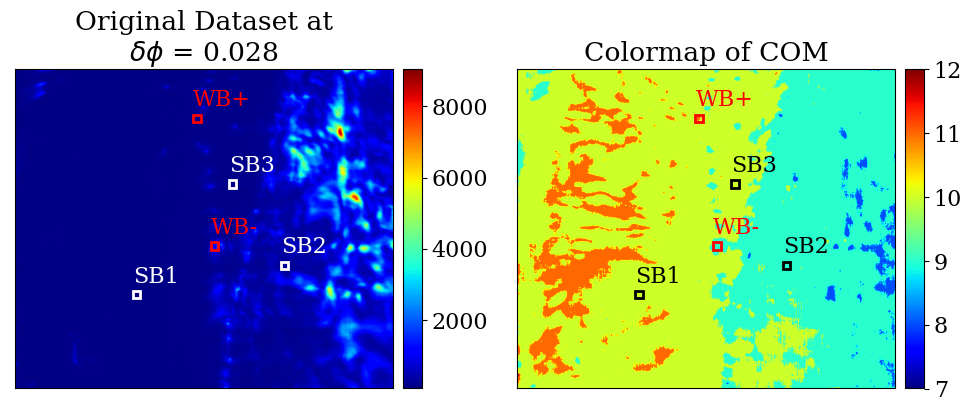

In [95]:
# plot the colormap of center of mass and the selected rois
fig,ax = plt.subplots(1,2,figsize = (10,5))
im = ax[1].imshow(colormap.astype(int), vmax = 12, vmin = 7, cmap = 'jet') 
# im = ax[1].imshow(colormap, vmax = 12, vmin = 7, cmap = 'jet') 


# mask
# ten_inds = np.where(colormap>9.5)
# colormap_new = np.zeros(colormap.shape)
# colormap_new[ten_inds] = 1
# ax[1].imshow(colormap_new)

ax[1].set_title("Colormap of COM")
divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right",size="5%",pad=0.1)
plt.colorbar(im,cax=cax)

im0 = ax[0].imshow(rockinglayer[:,:,7], cmap='jet')
ax[0].set_title('Original Dataset at\n'+r'$\delta\phi$ = 0.028')
divider0 = make_axes_locatable(ax[0])
cax0 = divider0.append_axes("right",size="5%",pad=0.1)
plt.colorbar(im0,cax=cax0)

re_off_defect_roi1 = [1500, 1550, 800, 850] #(1025, 575)
re_off_defect_roi2 = [1300, 1350, 1800, 1850] #(1525,2375) 
re_off_defect_roi3 = [750,800,1450,1500]
re_on_defect_minus_roi = [1170, 1220, 1328, 1378] # (1200,1350)
re_on_defect_plus_roi = [305, 355, 1208, 1258] #(330,1220)
roi = [re_off_defect_roi1,re_off_defect_roi2,re_off_defect_roi3,re_on_defect_minus_roi,re_on_defect_plus_roi]
color0 = ['white','white','white','red','red']
color1 = ['black','black','black','red','red']
text = ['SB1','SB2','SB3','WB-','WB+']

# define the patch for ROI value
if type(roi[0]) == type(1):
    patch_roi0 = patches.Rectangle((roi[2],roi[0]),np.abs(roi[3]-roi[2]),np.abs(roi[1]-roi[0]),linewidth = 2, edgecolor= color0, facecolor = 'none')
    patch_roi1 = patches.Rectangle((roi[2],roi[0]),np.abs(roi[3]-roi[2]),np.abs(roi[1]-roi[0]),linewidth = 2, edgecolor= color1, facecolor = 'none')
    ax[0].add_patch(patch_roi0)
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[1].add_patch(patch_roi1)
    
else:
    for index in range(len(roi)):
        print(f'Add {index+1} patch')
        patch_roi0 = patches.Rectangle((roi[index][2],roi[index][0]),np.abs(roi[index][3]-roi[index][2]),np.abs(roi[index][1]-roi[index][0]),linewidth = 2, edgecolor= color0[index], facecolor = 'none')
        patch_roi1 = patches.Rectangle((roi[index][2],roi[index][0]),np.abs(roi[index][3]-roi[index][2]),np.abs(roi[index][1]-roi[index][0]),linewidth = 2, edgecolor= color1[index], facecolor = 'none')        
        ax[0].add_patch(patch_roi0)
        ax[1].add_patch(patch_roi1)
        ax[0].text(roi[index][2], roi[index][0]-60, text[index], color = color0[index])
        ax[1].text(roi[index][2], roi[index][0]-60, text[index], color = color1[index])
        for j in range(2):
            ax[j].set_xticks([])
            ax[j].set_yticks([])

plt.tight_layout()

In [97]:
print(rockinglayer[:,:,7][1000,1000])
print(np.log2(rockinglayer[:,:,7][1000,1000]))
print(log2_rockinglayer[:,:,7][1000,1000])


125.0
6.965784284662087
0.44222232860507393


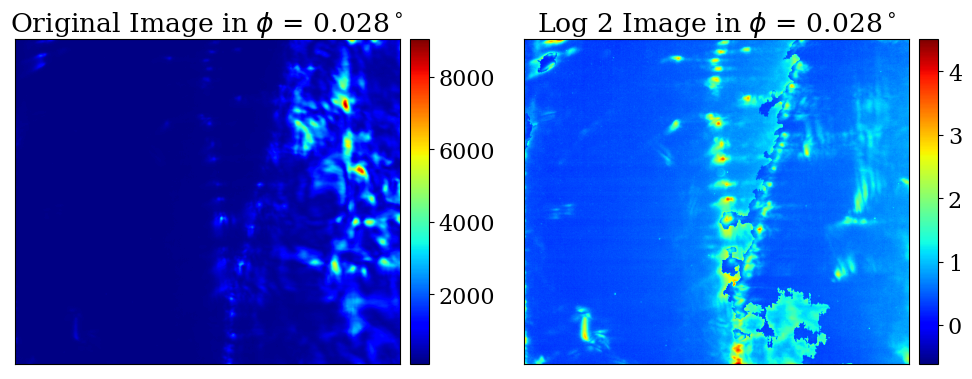

In [86]:
# plot the colormap of center of mass and the selected rois
fig,ax = plt.subplots(1,2,figsize = (10,6))

plots = [rockinglayer[:,:,7],log2_rockinglayer[:,:,7]]
color = ['black','red']
text = ['SB','WB-','WB+']

title = [r"Original Image in $\phi$ = 0.028$^\circ$", r"Log 2 Image in $\phi$ = 0.028$^\circ$"]
for i in range(2):
    im = ax[i].imshow(plots[i], cmap = 'jet') 
    ax[i].set_title(title[i])
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    divider = make_axes_locatable(ax[i])
    cax = divider.append_axes("right",size="5%",pad=0.1)
    plt.colorbar(im,cax=cax)
        
plt.tight_layout()

Colormap Min:8.537599213706278
Colormap Max:12.413606786318372


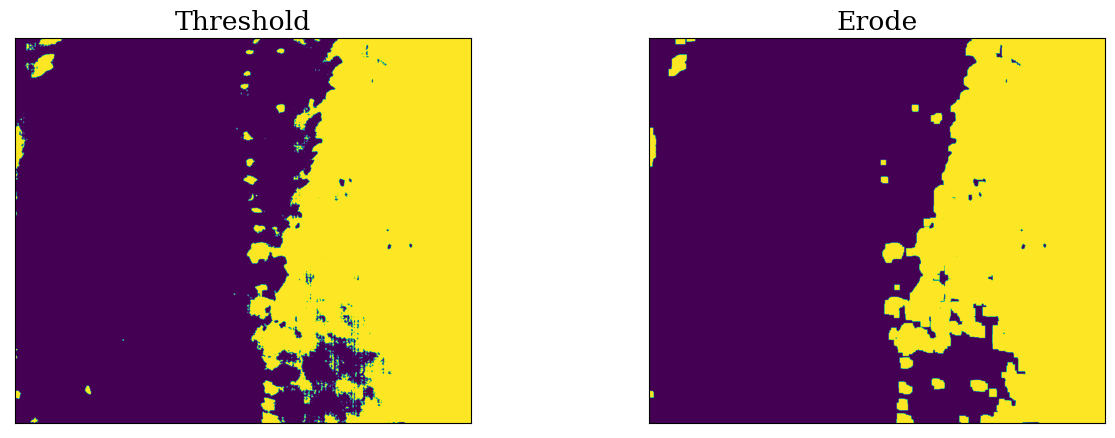

In [7]:
# colormap
fig, ax = plt.subplots(1,2,figsize = (15,5))
upper_thres = 10
lower_thres = 9.5
print(f"Colormap Min:{np.min(colormap)}")
print(f"Colormap Max:{np.max(colormap)}")
thres_colormap = np.zeros(colormap.shape) + 1
thres_colormap[colormap > upper_thres] = 0

# thres_colormap[colormap < lower_thres] = 1
# T, thres_colormap = cv2.threshold(colormap,10,1,cv2.THRESH_BINARY)

# Creating kernel
kernel = np.ones((29, 29), np.uint8)

ero_colormap = np.copy(thres_colormap)

for i in range(16):
    ero_colormap = cv2.erode(ero_colormap, kernel) 
    ero_colormap = cv2.dilate(ero_colormap, kernel)

plots = [thres_colormap, ero_colormap]
titles = ["Threshold","Erode"]

for i in range(2):
    ax[i].imshow(plots[i])
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    
    ax[i].set_title(titles[i])

# ax[0].set_title(f"Threshold {lower_thres}:{upper_thres}")

5508.5999999999385
0.0


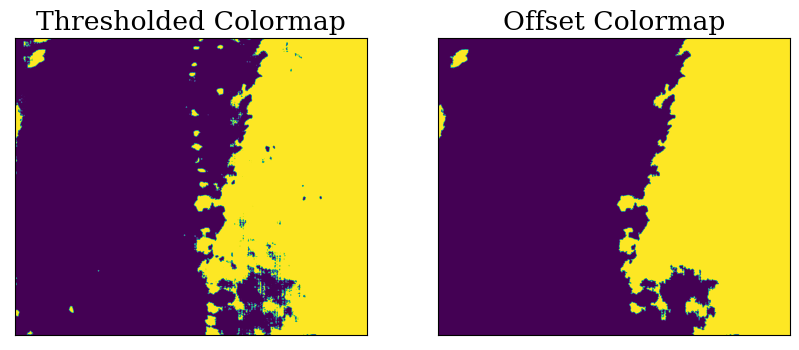

In [8]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

thres_img = np.uint8(thres_colormap)
area_val = []
contours, _ = cv2.findContours(thres_img, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
img = np.zeros(colormap.shape)

for c in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[c])
    area_val.append(w*h)

min_area = np.percentile(area_val, 99.5)

for index in range(len(area_val)):
    if area_val[index] > min_area:
        cont_img = cv2.drawContours(img, contours, index, color = (255,255,255), thickness = -1)


print(np.percentile(area_val,99))

ax[0].imshow(thres_img)
ax[0].set_title("Thresholded Colormap")
ax[1].imshow(cont_img)
ax[1].set_title("Offset Colormap")
# the dislocation information is excluded
for i in range(2):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
print(cont_img[1000, 1000])

In [17]:
corrected_rockinglayer = gs.shift_correction(rockinglayer, colormap, thres_val = 10, mode = 1)
log2_rockinglayer = gs.Log2Rockinglayer(corrected_rockinglayer)
corrected_colormap = gs.rockingstep_COM_colormap(log2_rockinglayer)

Shape of corrected rockinglayer:(2160, 2560, 31)


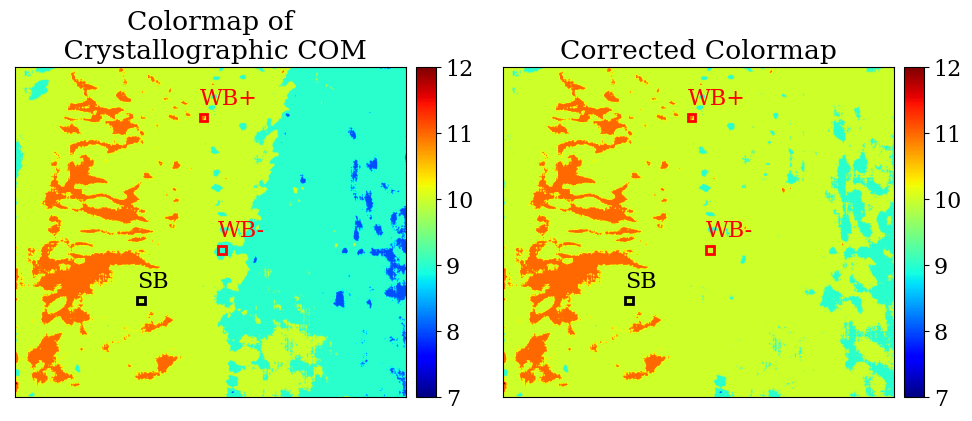

In [23]:
# plot the colormap of center of mass and the selected rois
fig,ax = plt.subplots(1,2,figsize = (10,6))

re_off_defect_roi = [1500, 1550, 800, 850] #(1025, 575)
re_on_defect_minus_roi = [1170, 1220, 1328, 1378] # (1200,1350)
re_on_defect_plus_roi = [305, 355, 1208, 1258] #(330,1220)
roi = [re_off_defect_roi,re_on_defect_minus_roi,re_on_defect_plus_roi]
color = ['black','red','red']
text = ['SB','WB-','WB+']

image = [colormap, corrected_colormap]
title = ["Colormap of\n Crystallographic COM", "Corrected Colormap"]
for i in range(2):
    im = ax[i].imshow(image[i].astype(int), vmax = 12, vmin = 7, cmap = 'jet') 
    ax[i].set_title(title[i])
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    divider = make_axes_locatable(ax[i])
    cax = divider.append_axes("right",size="5%",pad=0.1)
    plt.colorbar(im,cax=cax)
    for index in range(len(roi)):
        patch_roi = patches.Rectangle((roi[index][2],roi[index][0]),np.abs(roi[index][3]-roi[index][2]),np.abs(roi[index][1]-roi[index][0]),linewidth = 2, edgecolor= color[index], facecolor = 'none')  
        ax[i].add_patch(patch_roi)
        ax[i].text(roi[index][2], roi[index][0]-60, text[index], color = color[index])
        
plt.tight_layout()

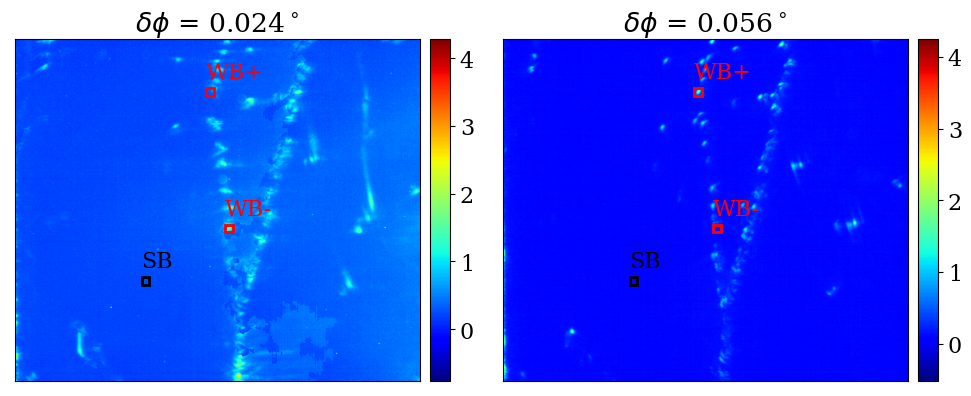

In [73]:
# plot the colormap of center of mass and the selected rois
fig,ax = plt.subplots(1,2,figsize = (10,6))

re_off_defect_roi = [1500, 1550, 800, 850] #(1025, 575)
re_on_defect_minus_roi = [1170, 1220, 1328, 1378] # (1200,1350)
re_on_defect_plus_roi = [305, 355, 1208, 1258] #(330,1220)
roi = [re_off_defect_roi,re_on_defect_minus_roi,re_on_defect_plus_roi]
color = ['black','red','red']
text = ['SB','WB-','WB+']

image = [log2_rockinglayer[:,:,6], log2_rockinglayer[:,:,14]]
title = [r"$\delta\phi$ = 0.024$^\circ$", r"$\delta\phi$ = 0.056$^\circ$"]
for i in range(2):
    im = ax[i].imshow(image[i], cmap = 'jet') 
    ax[i].set_title(title[i])
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    divider = make_axes_locatable(ax[i])
    cax = divider.append_axes("right",size="5%",pad=0.1)
    plt.colorbar(im,cax=cax)
    for index in range(len(roi)):
        patch_roi = patches.Rectangle((roi[index][2],roi[index][0]),np.abs(roi[index][3]-roi[index][2]),np.abs(roi[index][1]-roi[index][0]),linewidth = 2, edgecolor= color[index], facecolor = 'none')  
        ax[i].add_patch(patch_roi)
        ax[i].text(roi[index][2], roi[index][0]-60, text[index], color = color[index])
        
plt.tight_layout()


In [41]:
re_log2_off = gs.get_img_roi_array(log2_rockinglayer, re_off_defect_roi1)
re_log2_minus = gs.get_img_roi_array(log2_rockinglayer, re_on_defect_minus_roi)
re_log2_plus = gs.get_img_roi_array(log2_rockinglayer, re_on_defect_plus_roi)

re_log2_mean_norm_off = gs.get_normalized_intensity_list(gs.get_mean_intensity_list(re_log2_off))
re_log2_mean_norm_minus = gs.get_normalized_intensity_list(gs.get_mean_intensity_list(re_log2_minus))
re_log2_mean_norm_plus = gs.get_normalized_intensity_list(gs.get_mean_intensity_list(re_log2_plus))

The inner product of the list is 1.0
The inner product of the list is 1.0000000000000002
The inner product of the list is 1.0


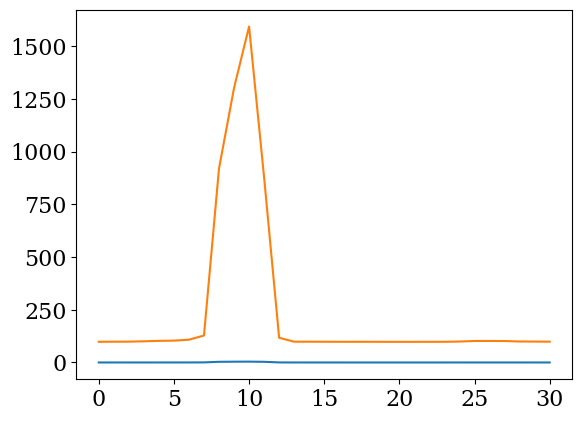

In [92]:
re_off = gs.get_img_roi_array(rockinglayer, re_off_defect_roi1)
re_mean_off = gs.get_mean_intensity_list(re_off)
re_log2_mean_off = gs.get_mean_intensity_list(re_log2_off)
plt.plot(np.arange(31), re_log2_mean_off)
plt.plot(np.arange(31), re_mean_off)

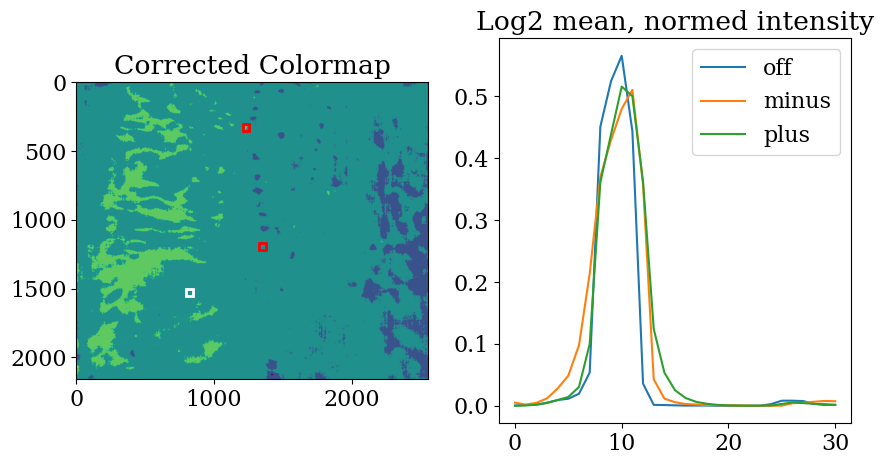

In [42]:
fig, ax = plt.subplots(1,2,figsize = (10,5))
roi = [re_off_defect_roi1,re_on_defect_minus_roi,re_on_defect_plus_roi]
plot_list = [re_log2_mean_norm_off, re_log2_mean_norm_minus, re_log2_mean_norm_plus]
label_list = ['off','minus','plus']
color = ['white','red','red']

im = ax[0].imshow(corrected_colormap.astype(int))#, vmax = 15.4, vmin = 14.8)
ax[0].set_title("Corrected Colormap")
for index in range(len(roi)):
        patch_roi = patches.Rectangle((roi[index][2],roi[index][0]),np.abs(roi[index][3]-roi[index][2]),np.abs(roi[index][1]-roi[index][0]),linewidth = 2, edgecolor= color[index], facecolor = 'none')
        ax[0].add_patch(patch_roi)

for i in range(len(plot_list)):
    ax[1].plot(plot_list[i], label = label_list[i])
ax[1].set_title('Log2 mean, normed intensity')
plt.legend()

- why are we using patches to compute the gram-schmidt component?
- the next block is using the mean intensity to compute the gram-schmidt component

In [44]:
# Gram_Schmidt_off1, Gram_Schmidt_off2, Gram_Schmidt_minus, Gram_Schmidt_plus = Gram_Schmidt(arrays)
arrays = [re_log2_off, re_log2_minus, re_log2_plus]
Gram_Schmidt_off, Gram_Schmidt_minus, Gram_Schmidt_plus = gs.Gram_Schmidt_list(arrays)

In 1th array
1th array is taken mean intensity and normalized

In 2th array
1th array is being removed...
2th array is taken mean intensity and normalized

In 3th array
1th array is being removed...
2th array is being removed...
3th array is taken mean intensity and normalized



In [45]:
print(np.dot(Gram_Schmidt_off,Gram_Schmidt_off))
print(np.dot(Gram_Schmidt_off,Gram_Schmidt_minus))
print(np.dot(Gram_Schmidt_off,Gram_Schmidt_plus))
print(np.dot(Gram_Schmidt_minus,Gram_Schmidt_plus))

1.0
-6.29325151019211e-16
3.075447882472382e-15
7.405913989705359e-16


10 12 13


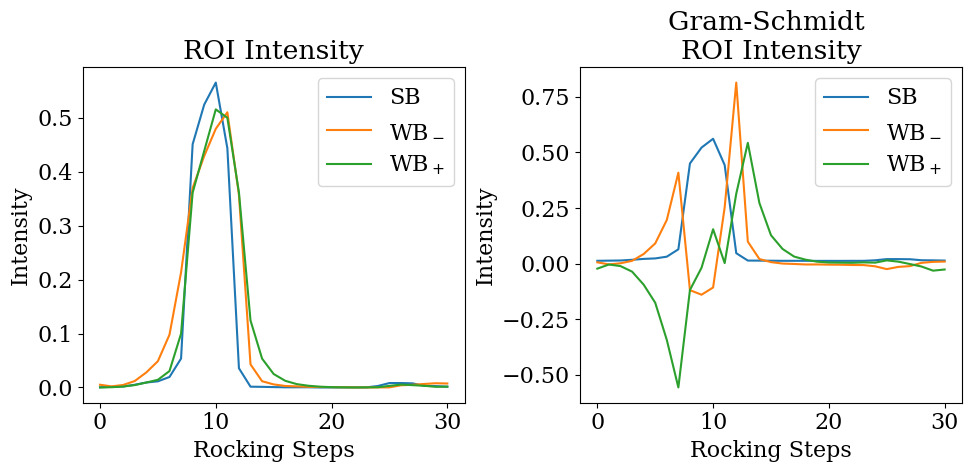

In [58]:
fig, ax = plt.subplots(1,2,figsize = (10,5))

ROI_intensity = [re_log2_mean_norm_off, re_log2_mean_norm_minus, re_log2_mean_norm_plus]
GS_components = [Gram_Schmidt_off, Gram_Schmidt_minus, Gram_Schmidt_plus]
labels = ["SB", r"WB$_-$", r"WB$_+$"]
titles = ["ROI Intensity","Gram-Schmidt \nROI Intensity"]

for i in range(3):
    ax[0].plot(ROI_intensity[i], label = labels[i])
    ax[1].plot(GS_components[i], label = labels[i])

for i in range(2):
    ax[i].set_xlabel("Rocking Steps")
    ax[i].set_ylabel("Intensity")
    ax[i].set_title(titles[i])
    ax[i].legend()

plt.tight_layout()
print(np.argmax(Gram_Schmidt_off), np.argmax(Gram_Schmidt_minus), np.argmax(Gram_Schmidt_plus))


No need for fitting the coefficients, project the whole dataset

In [59]:
# rockinglayer
# project to the intensity curve
rockinglayer_off = np.zeros((rockinglayer.shape[:2]))
rockinglayer_minus = np.zeros((rockinglayer.shape[:2]))
rockinglayer_plus = np.zeros((rockinglayer.shape[:2]))

plots = [Gram_Schmidt_off, Gram_Schmidt_minus, Gram_Schmidt_plus]

for i in range(rockinglayer.shape[0]):
    for j in range(rockinglayer.shape[1]):
        rockinglayer_off[i,j] = np.sum(np.multiply(Gram_Schmidt_off[:], log2_rockinglayer[i,j,:]))
        rockinglayer_minus[i,j] = np.sum(np.multiply(Gram_Schmidt_minus[:], log2_rockinglayer[i,j,:]))
        rockinglayer_plus[i,j] = np.sum(np.multiply(Gram_Schmidt_plus[:], log2_rockinglayer[i,j,:]))

In [81]:
def projectGS(rockinglayer, GScomponents):
    rockinglayer_SB = np.zeros((rockinglayer.shape[:2]))
    rockinglayer_WBminus = np.zeros((rockinglayer.shape[:2]))
    rockinglayer_WBplus = np.zeros((rockinglayer.shape[:2]))


    for i in range(rockinglayer.shape[0]):
        for j in range(rockinglayer.shape[1]):
            rockinglayer_SB[i,j] = np.sum(np.multiply(GScomponents[0][:], rockinglayer[i,j,:]))
            rockinglayer_WBminus[i,j] = np.sum(np.multiply(GScomponents[1][:], rockinglayer[i,j,:]))
            rockinglayer_WBplus[i,j] = np.sum(np.multiply(GScomponents[2][:], rockinglayer[i,j,:]))
    
    return rockinglayer_SB, rockinglayer_WBminus, rockinglayer_WBplus
    

In [82]:
GS_components = [Gram_Schmidt_off,Gram_Schmidt_minus,Gram_Schmidt_plus]
rockinglayer_SB, rockinglayer_WBminus, rockinglayer_WBplus = projectGS(log2_rockinglayer, GS_components)


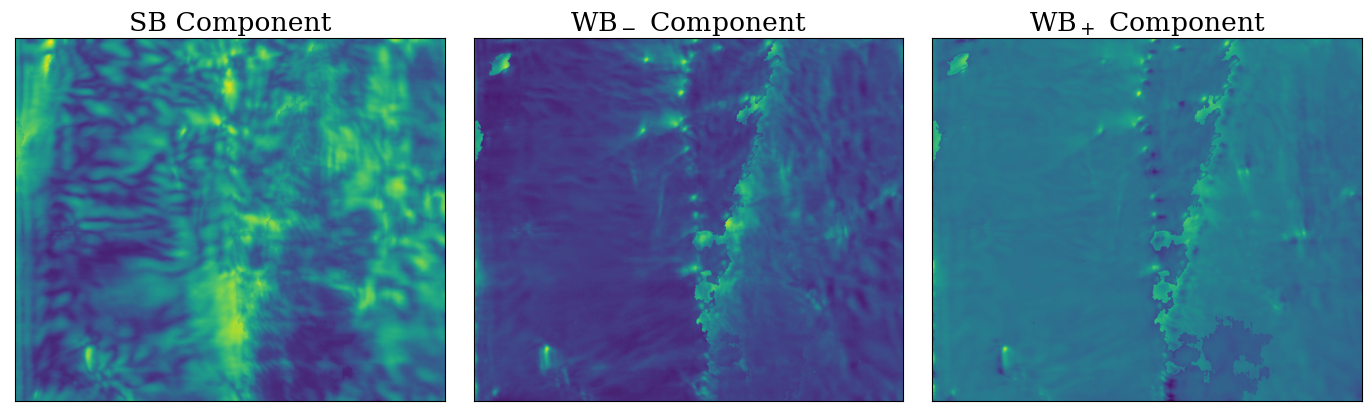

In [75]:
fig,ax = plt.subplots(1,3,figsize = (14,5))
plots = [rockinglayer_off, rockinglayer_minus, rockinglayer_plus]
titles = ["SB Component", r"WB$_-$ Component", r"WB$_+$ Component"]
for i in range(3):
    im = ax[i].imshow(plots[i])
    ax[i].set_title(titles[i])
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    # divider = make_axes_locatable(ax[i])
    # cax = divider.append_axes("right",size="5%",pad=0.1)
    # plt.colorbar(im,cax=cax)
plt.tight_layout()

Text(0.5, 0, 'Rocking Steps')

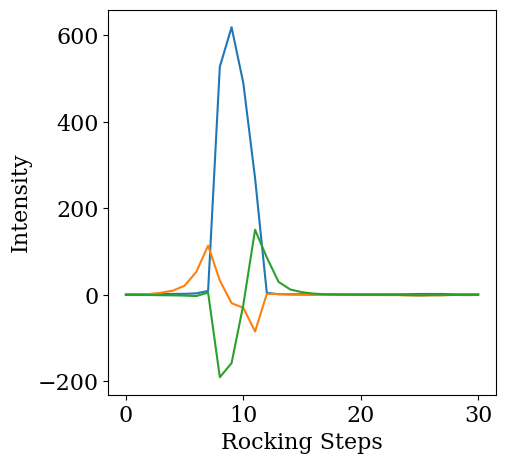

In [21]:
# plot the intensity to rocking step curve to check if the images actually decompose
fig, ax = plt.subplots(1,1, figsize = (5,5))
# random x, y
x = 100
y = 100

ax.plot(np.arange(len(rockinglayer_off1[x,y,:])),rockinglayer_off1[x,y,:])
ax.plot(np.arange(len(rockinglayer_minus[x,y,:])),rockinglayer_minus[x,y,:])
ax.plot(np.arange(len(rockinglayer_plus[x,y,:])),rockinglayer_plus[x,y,:])
ax.set_ylabel("Intensity")
ax.set_xlabel("Rocking Steps")

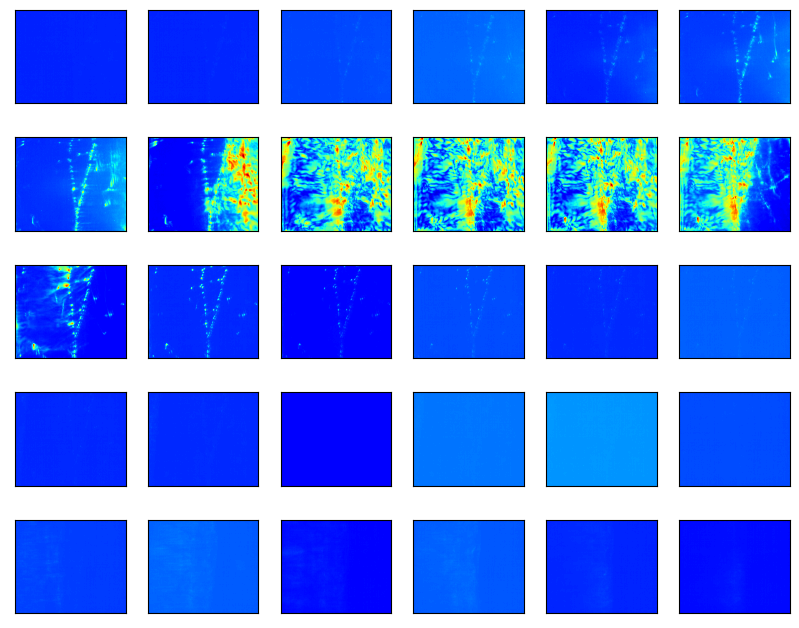

In [55]:
# plot all the plots out
fig, axes = plt.subplots(5,6, figsize = (10, 8))

for i, ax in enumerate(axes.flat):
    im = ax.imshow(log2_rockinglayer[:,:,i], cmap = 'jet')
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    

[]

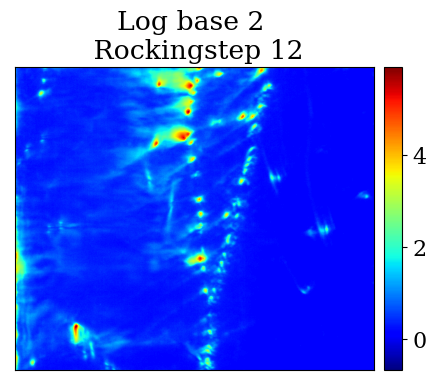

In [83]:
fig, ax = plt.subplots(1,1, figsize = (5,4))
im = ax.imshow(log2_rockinglayer[:,:,12],cmap = "jet")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right",size="5%",pad=0.1)
plt.colorbar(im,cax=cax)
ax.set_title("Log base 2 \n Rockingstep 12")
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])

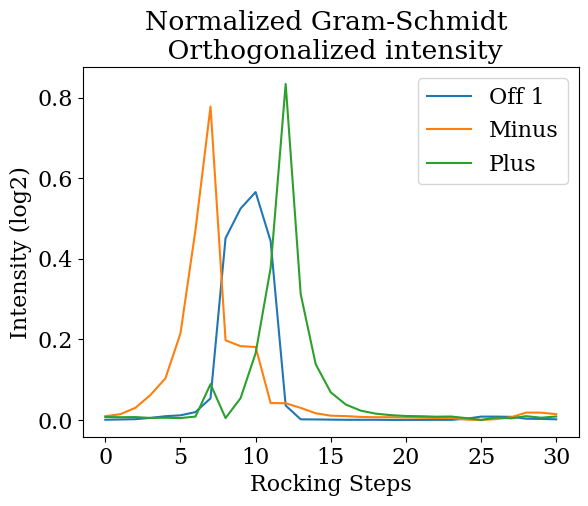

In [235]:
fig, ax = plt.subplots(1,1)
ax.plot(gs.get_normalized_intensity_list(Gram_Schmidt_off1), label = 'Off 1')
ax.plot(gs.get_normalized_intensity_list(Gram_Schmidt_minus), label = 'Minus')
ax.plot(gs.get_normalized_intensity_list(Gram_Schmidt_plus), label = 'Plus')
ax.set_title('Normalized Gram-Schmidt \n Orthogonalized intensity')
ax.set_xlabel('Rocking Steps')
ax.set_ylabel('Intensity (log2)')
plt.legend()